# Descriptives #

In [32]:
# import modules
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

import numpy as np

In [33]:
# read csv file to a pandas dataframe
df = pd.read_csv("data/online_shoppers_intention.csv")

> Number of Rows, Number of Columns

In [34]:
print('There are # number of rows in the dataset    :', df.shape[0])
print('There are # number of columns in the dataset :', df.shape[1])

There are # number of rows in the dataset    : 12330
There are # number of columns in the dataset : 18


> Show columns with associated datatypes and how many are non-null

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [36]:
# convert table to markdown
# see source: note: https://tableconvert.com/

| Variable                 | # values            |  Data Type |
|--------------------------|--------------------|---------|
| Administrative           | 12330    non\-null | int64   |
| Administrative\_Duration | 12330    non\-null | float64 |
| Informational            | 12330    non\-null | int64   |
| Informational\_Duration  | 12330    non\-null | float64 |
| ProductRelated           | 12330    non\-null | int64   |
| ProductRelated\_Duration | 12330    non\-null | float64 |
| BounceRates              | 12330    non\-null | float64 |
| ExitRates                | 12330    non\-null | float64 |
| PageValues               | 12330    non\-null | float64 |
| SpecialDay               | 12330    non\-null | float64 |
| Month                    | 12330    non\-null | object  |
| OperatingSystems         | 12330    non\-null | int64   |
| Browser                  | 12330    non\-null | int64   |
| Region                   | 12330    non\-null | int64   |
| TrafficType              | 12330    non\-null | int64   |
| VisitorType              | 12330    non\-null | object  |
| Weekend                  | 12330    non\-null | bool    |
| Revenue                  | 12330    non\-null | bool    |


>  Group Columns By Data Type

In [37]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('bool'): Index(['Weekend', 'Revenue'], dtype='object'),
 dtype('int64'): Index(['Administrative', 'Informational', 'ProductRelated', 'OperatingSystems',
        'Browser', 'Region', 'TrafficType'],
       dtype='object'),
 dtype('float64'): Index(['Administrative_Duration', 'Informational_Duration',
        'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
        'SpecialDay'],
       dtype='object'),
 dtype('O'): Index(['Month', 'VisitorType'], dtype='object')}

In [38]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [39]:
df.describe().round(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00
mean,2.32,80.82,0.50,34.47,31.73,1194.75,0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07
std,3.32,176.78,1.27,140.75,44.48,1913.67,0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00
75%,4.00,93.26,0.00,0.00,38.00,1464.16,0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00
max,27.00,3398.75,24.00,2549.38,705.00,63973.52,0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00


In [40]:
# show unique elements for feature Month
print(df['Month'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [41]:
# show unique elements for feature VisitorType
print(df['VisitorType'].unique())

['Returning_Visitor' 'New_Visitor' 'Other']


# Visualize Dataset

## Boxplots 

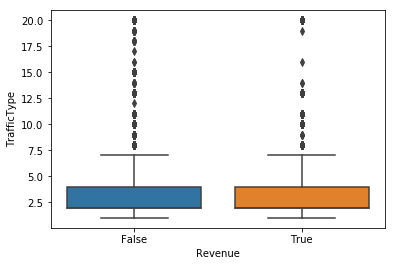

In [42]:
ax = sns.boxplot(y="TrafficType",x="Revenue", data=df)

## Histograms 

In [49]:
# function for histogram
def plot_hist_norm(df, column, bin_amount=25):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(df[column])

    # Plot the histogram.
    ## Set the alpha value used for blending (how transparent the color is)
    plt.hist(df[column], bins=bin_amount, density=True, alpha=0.8, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

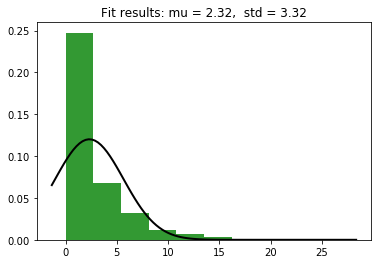

In [50]:
plot_hist_norm(df, column='Administrative', bin_amount=10)

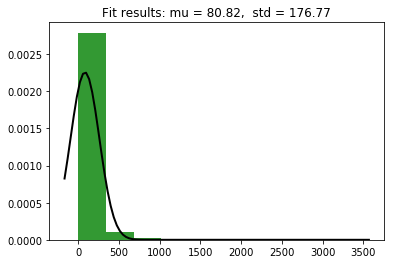

In [57]:
plot_hist_norm(df, column='Administrative_Duration', bin_amount=10)

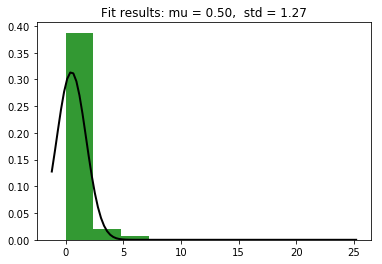

In [59]:
plot_hist_norm(df, column='Informational', bin_amount=10)